In [50]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [51]:
import pandas as pd
import numpy as np


In [52]:
#read file
data=pd.read_csv('/content/drive/MyDrive/ML_Dataset/diabetes.csv')

In [53]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
data.shape
# data.describe()
# data.info()

(768, 9)

In [55]:
#to check null values
data.isnull().sum()
#if null values there
#data.dropna(inplace=True)
#data.isnull().sum()
#data.head()
#data.info

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
#check unique values
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [34]:
data.drop_duplicates(inplace=True)

In [35]:
data.shape

(768, 9)

In [36]:
ohe_data=pd.get_dummies(data)# categorical ----> numerical data

In [37]:
ohe_data.shape

(768, 9)

In [38]:
x=ohe_data.drop('Outcome',axis=1)#x-->data you will use to make predictions
y=ohe_data['Outcome']#y-->data you are trying to predict

In [39]:
#split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
#test_size=0.3--->30% of the data will be used for testing, and the remaining 70% will be used for training.
#random_state--->Controls the shuffling applied to the data before applying the split.( will give you the same split every time you run the code.)

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [41]:
#do standardization
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
sd.fit(X_train)
X_train=sd.transform(X_train)
X_test=sd.transform(X_test)

In [42]:
#feature Extraction
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)


{'whiskers': [<matplotlib.lines.Line2D at 0x7e289468c280>,
 'caps': [<matplotlib.lines.Line2D at 0x7e289468c7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e289465ffa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7e289468cd00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e289468cfa0>,
 'means': []}

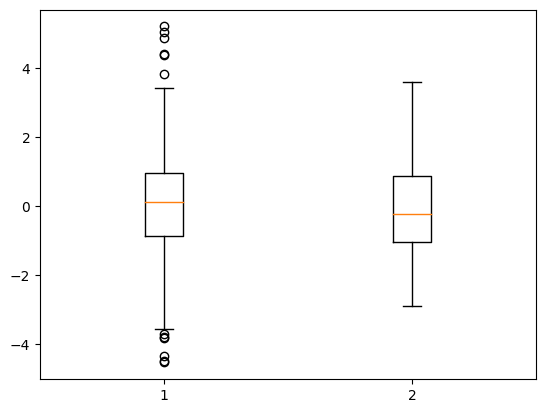

In [43]:
#outliers detection
import matplotlib.pyplot as plt
plt.boxplot(X_train)

In [44]:
#outliers detection using iqr
Q1=np.percentile(X_train,25,interpolation='midpoint')
Q3=np.percentile(X_train,75,interpolation='midpoint')
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)


1.910958606060846
-3.833607967161675
3.8102264570817095


In [45]:
#use svm
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


In [46]:
#do classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       147
           1       0.60      0.42      0.49        84

    accuracy                           0.69       231
   macro avg       0.66      0.63      0.63       231
weighted avg       0.68      0.69      0.67       231



In [47]:
#use logestic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       147
           1       0.59      0.46      0.52        84

    accuracy                           0.69       231
   macro avg       0.66      0.64      0.64       231
weighted avg       0.68      0.69      0.68       231



In [48]:
#use xgboost
!pip install xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       147
           1       0.62      0.54      0.57        84

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.70      0.71      0.71       231

